# 1. Introduction

Nama: Dwi Adhi Widigda Kartomihardjo

Batch: FTDS-027

Program ini dibuat untuk melakukan analisis Clustering untuk perusahaan Bank Berlian untuk mencari Customer Segmentation pengguna kartu kredit selama 6 bulan terakhir. Harapan yang dari program ini adalah program dapat memberikan rekomendasi bisnis dari setiap Customer Cluster dan insight bisnis lain nya.

# 2. Import Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from sklearn.cluster import KMeans
from scipy.stats import spearmanr
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples



Cell berikut berisi libraries yang digunakan di program ini.

# 3. Query SQL

SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_027_hck.credit-card-information`
WHERE MOD(CUST_ID,2) = 1;

Query memanggil data untuk csv P1G6_dwi_adhi.csv

# 4. Data Loading

In [97]:
df = pd.read_csv('P1G6_dwi_adhi.csv')

dataframe menggunakan P1G6_dwi_adhi.csv

In [98]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,365,0.859447,0.454545,23.00,23.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,3000.0,0.000000,NaN,0.000000,12
1,731,14.871714,0.545455,62.70,62.70,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,3000.0,125.780361,164.519883,0.000000,12
2,2353,71.046063,0.181818,1023.80,1023.80,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,2,20000.0,5872.895164,116.063003,0.000000,12
3,7901,1381.274840,1.000000,71.80,71.80,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,3500.0,304.742004,415.236204,0.000000,12
4,6563,15.491884,0.272727,84.00,0.00,84.00,0.0,0.166667,0.000000,0.166667,0.0,0,4,5000.0,178.182720,55.922251,0.272727,12
5,4051,112.010460,1.000000,229.00,229.00,0.00,0.0,0.181818,0.181818,0.000000,0.0,0,4,150.0,119.626820,252.515849,0.000000,11
6,4261,1631.573904,1.000000,112.56,112.56,0.00,0.0,0.181818,0.181818,0.000000,0.0,0,3,1700.0,439.132886,690.430521,0.000000,11
7,5309,1513.759633,1.000000,70.00,70.00,0.00,0.0,0.181818,0.181818,0.000000,0.0,0,2,1700.0,2085.049719,3812.357397,0.000000,11
8,4413,12.281874,0.100000,153.11,153.11,0.00,0.0,0.200000,0.200000,0.000000,0.0,0,2,9000.0,0.000000,NaN,0.000000,10
9,877,776.585568,1.000000,773.36,119.80,653.56,0.0,0.333333,0.083333,0.250000,0.0,0,7,3000.0,1169.758034,233.843501,0.000000,12


Cell berikut menampilkan 10 data pertama di df

In [99]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6187,7387.803893,1.000000,208.00,208.00,0.00,6728.679523,0.250000,0.250000,0.000000,0.416667,7,3,14000.0,1613.637071,1686.828820,0.000000,12
4466,6917,409.194212,0.545455,1213.23,1213.23,0.00,1751.419465,0.250000,0.250000,0.000000,0.416667,8,9,6000.0,5997.800728,178.416838,0.000000,12
4467,5027,1325.679991,1.000000,1084.87,687.57,397.30,3330.913556,0.833333,0.333333,0.833333,0.416667,9,16,3000.0,4135.414563,405.944341,0.090909,12
4468,1275,1520.623758,0.818182,0.00,0.00,0.00,3135.113427,0.000000,0.000000,0.000000,0.454545,7,0,5000.0,719.805537,372.930377,0.000000,11
4469,6789,3076.422342,1.000000,329.36,0.00,329.36,2248.274005,0.166667,0.000000,0.166667,0.500000,10,3,3500.0,836.317805,1331.978248,0.000000,12
4470,8427,632.807858,1.000000,453.91,318.91,135.00,927.939586,0.583333,0.333333,0.250000,0.500000,8,8,6000.0,350.387978,228.165965,0.000000,12
4471,2949,894.990470,0.636364,3184.54,2486.98,697.56,1578.893925,1.000000,0.583333,1.000000,0.500000,12,48,6500.0,3567.009988,220.979761,0.083333,12
4472,2327,2894.348509,1.000000,657.71,310.70,347.01,3384.772636,1.000000,0.166667,0.916667,0.583333,17,21,3500.0,3166.765636,1006.614717,0.000000,12
4473,1525,1854.659145,1.000000,151.69,151.69,0.00,443.392028,0.083333,0.083333,0.000000,0.750000,14,2,2000.0,496.543523,591.508322,0.000000,12
4474,8635,5589.888793,1.000000,454.36,454.36,0.00,4441.706964,0.166667,0.166667,0.000000,0.833333,30,7,6600.0,1767.288568,1866.858931,0.000000,12


Cell berikut menampilkan 10 data terakhir di df

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Cell berikut menampilkan summary dari df. Dataframe df terdiri dari 18 kolom dan 4475 baris dengan tipe data numerik. Terdapat missing value di kolom MIMUM_PAYMENT 4320

In [101]:
# Cek Duplikat
df.duplicated().sum()

np.int64(0)

Dataframe df tidak memiliki baris yang duplikat

# 6. Exploratory Data Analysis Part 1

In [102]:
list_kolom_eda = ['PURCHASES','BALANCE','PAYMENTS','TENURE']
for kolom in list_kolom_eda:
    print(f'kolom {kolom} memiliki nilai skew ', df[kolom].skew())

kolom PURCHASES memiliki nilai skew  7.071705718331177
kolom BALANCE memiliki nilai skew  2.3290088807150915
kolom PAYMENTS memiliki nilai skew  5.747503259811283
kolom TENURE memiliki nilai skew  -2.954158581529189


Kolom PURCHASES, BALANCE, PAYMENTS, dan TENURE memiliki distribusi yang skewed oleh karena itu metode korelasi yang akan digunkan adalah spearman karena metode ini non-parametric atau tidak mengasumsikan distribusi normal.

In [103]:
df_eda_1 = df[['PURCHASES','BALANCE','PAYMENTS','TENURE']]
df_eda_1

,PURCHASES,BALANCE,PAYMENTS,TENURE
0,23.00,0.859447,0.000000,12
1,62.70,14.871714,125.780361,12
2,1023.80,71.046063,5872.895164,12
3,71.80,1381.274840,304.742004,12
4,84.00,15.491884,178.182720,12
...,...,...,...,...
4470,453.91,632.807858,350.387978,12
4471,3184.54,894.990470,3567.009988,12
4472,657.71,2894.348509,3166.765636,12
4473,151.69,1854.659145,496.543523,12


In [104]:
corr_matrix = df_eda_1.corr(method='spearman')
round(corr_matrix,2)

,PURCHASES,BALANCE,PAYMENTS,TENURE
PURCHASES,1.00,0.01,0.39,0.13
BALANCE,0.01,1.00,0.45,0.06
PAYMENTS,0.39,0.45,1.00,0.20
TENURE,0.13,0.06,0.20,1.00


<Axes: >

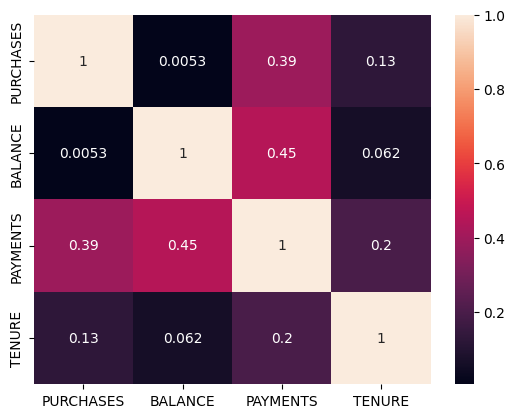

In [105]:
sns.heatmap(corr_matrix, annot=True)

Bedasarkan heatmap, PURCHASES, BALANCE, dan PAYMENTS memiliki nilai korelasi 0.13, 0.062, dan 0.2. Kolom PURCHASES dan PAYMENTS memiliki nilai diatas 0.1 dan walaupun kecil, dua kolom ini memiliki korelasi positif yang lemah dengan TENURE. BALANCE memiliki nilai korelasi yang mendekati 0 dan bisa dibilang kolom ini tidak memiliki korelasi dengan TENURE.

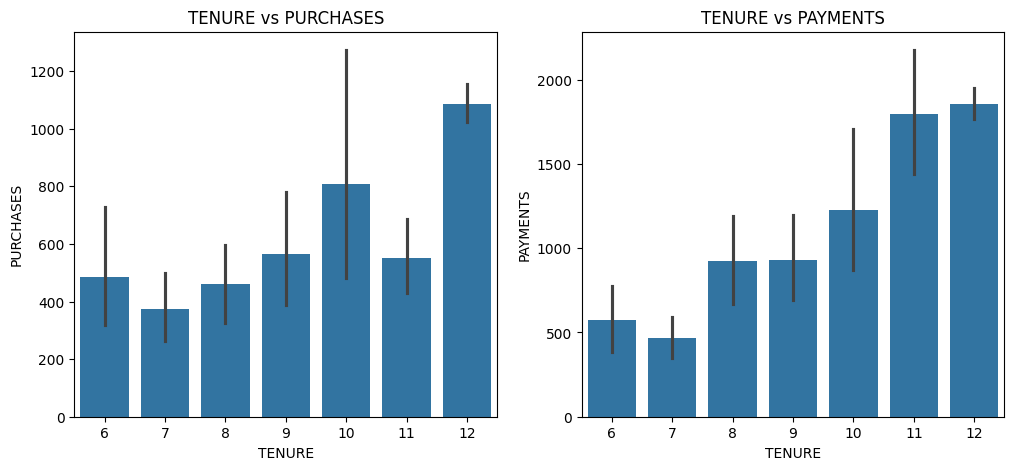

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x="TENURE", y="PURCHASES", data=df, ax=axes[0])
axes[0].set_title("TENURE vs PURCHASES")

sns.barplot(x="TENURE", y="PAYMENTS", data=df, ax=axes[1])
axes[1].set_title("TENURE vs PAYMENTS")

plt.show()

Cell berikut adalah bargraph TENURE dengan PURCHASES dan TENURE dengan PAYMENTS. TENURE 12 memiliki PURCHASES dan PAYMENT terbanyak. Hal ini masuk akal karena semakin lama penggunaan kartu kredit semakin banyak total pembelian dan pembayaran. Rekomendasi bisnis untuk hal ini bisa dalam bentuk hadiah seperti loyalty poin dimana tenur 12 dengan total pembelian tertentu akan diberikan hadiah berupa diskon, voucher atau redeem barang.

In [107]:
print(f'kolom CREDIT_LIMIT memiliki nilai skew ', df['CREDIT_LIMIT'].skew())

kolom CREDIT_LIMIT memiliki nilai skew  1.4989477169411476


In [108]:
statistic, p_value = spearmanr(df['CREDIT_LIMIT'],df['TENURE'])
print(f'Nilai korelasi adalah: {statistic}')
print(f'Nilai p-value adalah: {p_value}')

Nilai korelasi adalah: 0.162176761192742
Nilai p-value adalah: 9.434096907403407e-28


<Axes: xlabel='TENURE', ylabel='CREDIT_LIMIT'>

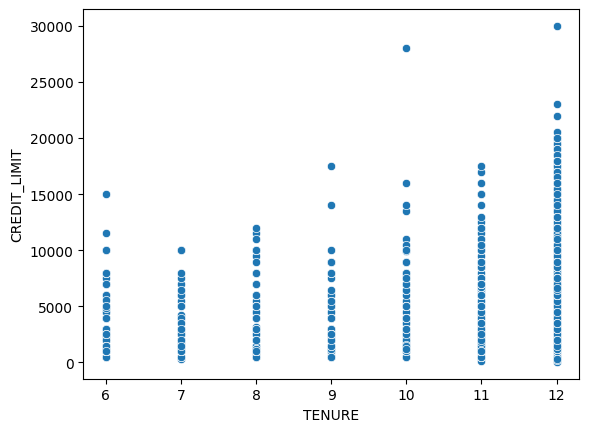

In [109]:
sns.scatterplot(x = "TENURE",y="CREDIT_LIMIT", data=df)

Bedasarkan scatter ini, terdapat pola meningkat antara TENURE dan CREDIT_LIMIT dimana semakin lama tenur, semakin banyak credit limit. Meskipun CREDIT_LIMIT dan TENURE memiliki korelasi positif saya rasa CREDIT_LIMIT tidak bisa dibuat rekomondasi bisnis secara sendiri karena menurut saya CREDIT_LIMIT memiliki hubungan dengan PAYMENTS dan PURCHASES. Pengguna dengan TENURE 12 memiliki CREDIT_LIMIT terbanyak yang memungkinkan pelanggan melakukan pembelian lebih banyak.

# 7. Feature Enginerring

## Missing Value

In [110]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 155 missing value di kolom MINIMUM_PAYMENTS

In [111]:
df[df['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,365,0.859447,0.454545,23.00,23.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,NaN,0.0,12
8,4413,12.281874,0.100000,153.11,153.11,0.00,0.000000,0.200000,0.200000,0.000000,0.000000,0,2,9000.0,0.000000,NaN,0.0,10
61,4769,677.466332,1.000000,283.30,0.00,283.30,668.675103,1.000000,0.000000,0.900000,0.100000,4,10,1000.0,0.000000,NaN,0.0,10
85,6113,6727.925578,1.000000,1694.48,1457.48,237.00,5881.182495,0.500000,0.500000,0.166667,0.333333,10,14,7000.0,0.000000,NaN,0.0,6
120,623,0.000000,0.000000,350.48,0.00,350.48,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2700.0,681.924724,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,7743,0.000000,0.000000,54.00,0.00,54.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,4000.0,0.000000,NaN,0.0,12
4322,889,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
4342,5109,0.190090,0.090909,267.00,0.00,267.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,198.562574,NaN,0.0,12
4416,221,0.000000,0.000000,140.04,0.00,140.04,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,129.905883,NaN,0.0,12


Cell berikut menampilkan baris dengan nilai di kolom MINIMUM_PAYMENTS nya NaN.

In [112]:
df[df['MINIMUM_PAYMENTS'].isna()]['TENURE'].value_counts()

TENURE
12    115
6      12
10      6
9       6
7       6
8       5
11      5
Name: count, dtype: int64

Bedasarkan distribusi baris dengan missing value, banyak yang memiliki missing value di MINIMUM_PAYMENTS memiliki TENURE salama 12 bulan dan yang paling 6 bulan. Bisa diasumsikan bahwa selama 6 bulan setidak nya user pernah melakukan transaksi oleh karena itu jenis missing value kolom ini adalah Missing At Random dan metode handle nya adalah dengan imputasi.

In [113]:
df['MINIMUM_PAYMENTS'].skew()

np.float64(14.669771084332643)

Kolom MINIMUM_PAYMENTS memiliki distribusi yang skew dan metode imputasi yang digunakan adalah dengan median.

In [114]:
median_min_pay = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(median_min_pay)

Kolom MINIMUM_PAYMENTS diisi dengan median_min_pay

In [115]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dataframe df sudah tidak adal missing value

## Handle Outlier

In [116]:
skewness = ''
listItem = []
num_column = df.select_dtypes(include=np.number).columns.tolist()
for kolom in num_column:
    if  -0.5 <= round(df[kolom].skew(),2) <= 0.5:
        skewness = 'normal'
    else:
        skewness = 'skew'
    listItem.append([kolom, round(df[kolom].skew(),2), skewness]) 
df_skew = pd.DataFrame(columns=['name_kolom','nilai_skew','distribusi'],data=listItem)
df_skew


,name_kolom,nilai_skew,distribusi
0,CUST_ID,0.00,normal
1,BALANCE,2.33,skew
2,BALANCE_FREQUENCY,-2.03,skew
3,PURCHASES,7.07,skew
4,ONEOFF_PURCHASES,9.95,skew
5,INSTALLMENTS_PURCHASES,6.33,skew
6,CASH_ADVANCE,5.64,skew
7,PURCHASES_FREQUENCY,0.06,normal
8,ONEOFF_PURCHASES_FREQUENCY,1.55,skew
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.51,skew


Untuk hendle outlier saya menghitung nilai skew dari setiap kolom. Jika nilai skew nya diantara -0.5 sampai 0.5 maka distribusi kolom normal dan jika nilai skew nya lebih besar daripada 0.5 atau lebih kecil dari -0.5 maka distribusi kolom skew. Setelah dihitung kolom hanya kolom CUST_ID dan PURCHASES_FREQUENCY memiliki distribusi normal karena nilai nya diantara -0.5 dan 0.5.

Kolom - kolom lainnya memiliki distribusi yang skew karena nilai skew nya lebih dari 0.5 atau lebih kecil dari -0.5 seperti kolom CASH_ADVANCE dengan nilai 5.64 dan BALANCE_FREQUENCY dengan nilai -2.03

In [117]:
column = []
lower_bound = []
upper_bound = []
percentage_outlier = []
for row in range(0, len(df_skew)):
    col = df_skew['name_kolom'][row]

    if df_skew['distribusi'][row] == 'skew':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        if -1 < df_skew['nilai_skew'][row] < 1:
            lower_boundary = df[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = df[col].quantile(0.75) + (IQR * 1.5)
        else:
            lower_boundary = df[col].quantile(0.25) - (IQR * 3)
            upper_boundary = df[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()

    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)
    total_outlier = (len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100)
    percentage_outlier.append(total_outlier)

outlier = pd.DataFrame({
    'column':column,
    'upper_boundary': [round(val,2)  for val in upper_bound],
    'lower_boundary': [round(val,2) for val in lower_bound],
    'percantage_outlier': [round(val,2) for val in percentage_outlier]
    })
outlier

,column,upper_boundary,lower_boundary,percantage_outlier
0,CUST_ID,12226.79,-3276.79,0.00
1,BALANCE,7816.98,-5644.98,2.08
2,BALANCE_FREQUENCY,1.33,0.56,13.43
3,PURCHASES,4291.00,-3149.02,4.65
4,ONEOFF_PURCHASES,2300.88,-1725.66,6.41
5,INSTALLMENTS_PURCHASES,1823.54,-1367.66,4.83
6,CASH_ADVANCE,4555.55,-3416.66,5.36
7,PURCHASES_FREQUENCY,1.70,-0.72,0.00
8,ONEOFF_PURCHASES_FREQUENCY,1.00,-0.75,0.00
9,PURCHASES_INSTALLMENTS_FREQUENCY,1.88,-1.12,0.00


In [118]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.00,2583.93,1.00,2238.00,4475.00,6712.00,8949.00
BALANCE,4475.0,1563.21,2072.05,0.00,124.43,871.36,2047.57,18495.56
BALANCE_FREQUENCY,4475.0,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,4475.0,1003.25,2060.03,0.00,39.56,360.00,1102.42,41050.40
ONEOFF_PURCHASES,4475.0,596.37,1653.43,0.00,0.00,45.65,575.22,40624.06
INSTALLMENTS_PURCHASES,4475.0,407.11,880.80,0.00,0.00,88.62,455.88,14686.10
CASH_ADVANCE,4475.0,984.29,2060.45,0.00,0.00,0.00,1138.89,47137.21
PURCHASES_FREQUENCY,4475.0,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.20,0.30,0.00,0.00,0.08,0.25,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.36,0.40,0.00,0.00,0.17,0.75,1.00


Cell berikut menampilkan persentase outlier dari setiap kolom. Kolom CUST_ID, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, 	PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, dan CREDIT_LIMIT memiliki persentase outlier yang mendekati 0 oleh karena itu outlier di kolom-kolom ini tidak perlu di handle. Selain persentasi yang kecil, kolom dengan nilai minim 0 dan maksimum 1 juga tidak perlu di handle seperti PRC_FULL_PAYMENT dan BALANCE_FREQUENCY. Kolom BALANCE juga tidak di handle karena selain persentase outlier nya lebih kecil dari 5%, balance yang sangat tinggi juga masuk akal di dunia nyata. 

Sisa kolom yaitu PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, MINIMUM_PAYMENTS saya handle karena setiap kolom ini memiliki persentase outlier yang cukup signifikan, di atas dan nilai nya ekstreme seperti ONEOFF_PURCHASES dengan nilai upper boundary 2300.88, rata-rata nya 596.37 dan nilai maksimum nya 40624.06.

Untuk handle outlier ini saya menggunakan metode capping untuk mempertahankan baris dan capping_method nya adalah iqr karena distribusi kolom ini sangat skew (nilai skew lebih dari 1)

In [119]:
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=3,
                        variables=['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX',
                                   'PAYMENTS','MINIMUM_PAYMENTS'])

Objek winsorizer dibuat untuk capping kolom PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, MINIMUM_PAYMENTS

## Feature Selection

In [120]:
df_clean = df.copy()
df_clean = df_clean.drop(columns='CUST_ID')
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.859447,0.454545,23.00,23.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,313.980229,0.000000,12
1,14.871714,0.545455,62.70,62.70,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,125.780361,164.519883,0.000000,12
2,71.046063,0.181818,1023.80,1023.80,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,20000.0,5872.895164,116.063003,0.000000,12
3,1381.274840,1.000000,71.80,71.80,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,304.742004,415.236204,0.000000,12
4,15.491884,0.272727,84.00,0.00,84.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,4,5000.0,178.182720,55.922251,0.272727,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,632.807858,1.000000,453.91,318.91,135.00,927.939586,0.583333,0.333333,0.250000,0.500000,8,8,6000.0,350.387978,228.165965,0.000000,12
4471,894.990470,0.636364,3184.54,2486.98,697.56,1578.893925,1.000000,0.583333,1.000000,0.500000,12,48,6500.0,3567.009988,220.979761,0.083333,12
4472,2894.348509,1.000000,657.71,310.70,347.01,3384.772636,1.000000,0.166667,0.916667,0.583333,17,21,3500.0,3166.765636,1006.614717,0.000000,12
4473,1854.659145,1.000000,151.69,151.69,0.00,443.392028,0.083333,0.083333,0.000000,0.750000,14,2,2000.0,496.543523,591.508322,0.000000,12


df_clean adalah kopian dari df dengan kolom CUST_ID di drop karena kolom ini adalah unique identifier dan tidak menunjukan pola.

## Feature Scaling

In [121]:
scaler = StandardScaler()

Scaler yang digunakan adalah StandardScaler karena data untuk kalkulasi PCA harus di normalisasi yang artinya rata-rata nya 0 dan variance nya 1. StandardScaler membuang rata-rata dan membuat variance nya 1.

## Dimensionality Reduction

In [122]:
pca =PCA()

Objek pca dibuat. PCA digunakan untuk mengurangi dimensi dengan mengubah feature menjadi component. PCA masih menggunakan default karena sakan menggunakan default n_component untuk analisis pca ideal nya.

## Pipeline

In [123]:
transformer = Pipeline([
    ('capping',winsorizer),
    ('scaling',scaler),
    ('reducing',pca)
])

Saya membuat pipeline bernama transformer untuk proses feature engineering. Dalam pipeline data akan capping outlier nya, scaling nilai, dan reducing untuk mengurangi dimensi nya.

In [124]:
transformer

Pipeline(steps=[('capping',
                 Winsorizer(capping_method='iqr', fold=3, tail='both',
                            variables=['PURCHASES', 'ONEOFF_PURCHASES',
                                       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                       'PAYMENTS', 'MINIMUM_PAYMENTS'])),
                ('scaling', StandardScaler()), ('reducing', PCA())])

df_clean di lakukan proses feature engineering.

In [125]:
transformer.fit_transform(df_clean)

array([[-2.05457386, -1.76629824, -0.92521503, ..., -0.00823475,
         0.01590319,  0.05435758],
       [-1.97156357, -1.74576515, -0.92310504, ...,  0.02820314,
         0.01392481,  0.04522649],
       [ 0.04847323,  0.23881217, -3.53077177, ...,  0.02510484,
         0.08240619, -0.21645871],
       ...,
       [ 0.28709817,  3.42247248,  1.9395103 , ...,  0.43634549,
        -0.04754208, -0.00677258],
       [-2.48623293,  2.02707571,  0.23579623, ..., -0.15323806,
        -0.05803008,  0.00571969],
       [-1.91632604,  5.54770676,  0.26809847, ..., -0.44467308,
        -0.09038168, -0.05113898]])

Cell ini untuk melatih pca di transfromer nya.

## PCA

Text(0, 0.5, 'Eigenvalues')

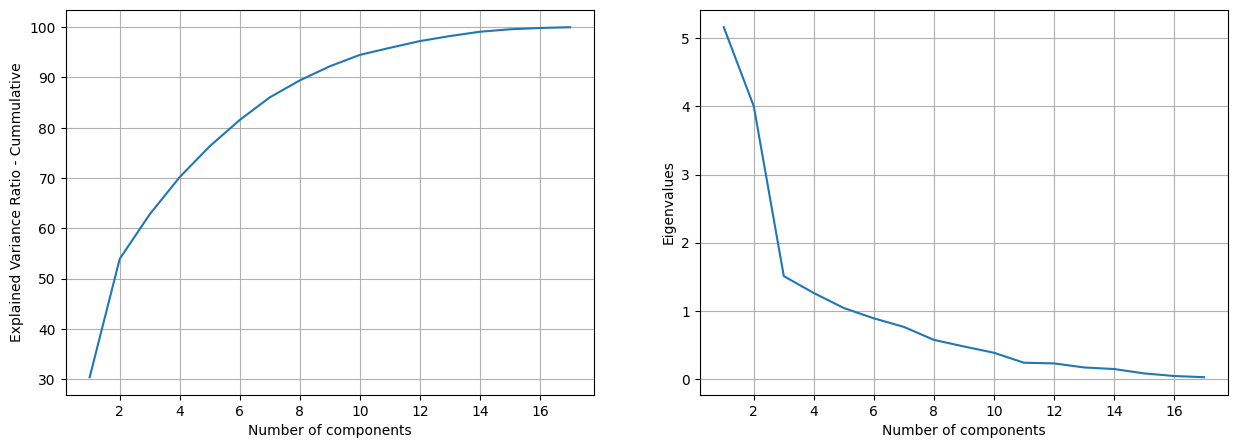

In [126]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Bedasarkan grafis pertama, 11 component dapat mempertahankan 95% informasi.

Bedasarkan grafis kedua, sebanyak kira-kira 1 sampai 5 component dapat merepresentasikan majoritas informasi karena nilai eigenvalues nya lebih dari 1. 

In [127]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(11)

Untuk mempertahankan 95% informasi sebanyak 11 feature yang digunakan.

In [128]:
pca = PCA(n_components=11)

pca dia update menggunakan n_compoent = 11

In [129]:
transformer = Pipeline([
    ('capping',winsorizer),
    ('scaling',scaler),
    ('reducing',pca)
])

In [130]:
transformer

Pipeline(steps=[('capping',
                 Winsorizer(capping_method='iqr', fold=3, tail='both',
                            variables=['PURCHASES', 'ONEOFF_PURCHASES',
                                       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                       'PAYMENTS', 'MINIMUM_PAYMENTS'])),
                ('scaling', StandardScaler()),
                ('reducing', PCA(n_components=11))])

transformer di panggil ulang karena pca nya di update

In [131]:
df_clean_transform_second = transformer.fit_transform(df_clean)
df_clean_transform_second

array([[-2.05457386, -1.76629824, -0.92521503, ...,  0.30604946,
        -0.23582041,  0.18577584],
       [-1.97156357, -1.74576515, -0.92310504, ...,  0.03764359,
        -0.21449467,  0.18600534],
       [ 0.04847323,  0.23881217, -3.53077177, ..., -2.01819335,
         0.93733755, -1.56488187],
       ...,
       [ 0.28709817,  3.42247248,  1.9395103 , ...,  0.34418891,
         0.81547253, -0.58752356],
       [-2.48623293,  2.02707571,  0.23579623, ...,  0.18662888,
        -1.46207624, -1.41165492],
       [-1.91632604,  5.54770676,  0.26809847, ...,  0.81886975,
        -0.71925954, -0.04972381]])

df_clean_tranform hasil transfor masin df_clean setelah masuk pipeline transformer

# 8. K Analysis

Untuk mencari nilai k atau berapa banyak cluster yang ideal untuk model saya akan melakukan evaluasi elbow method dan silhouette method.

## Elbow Method

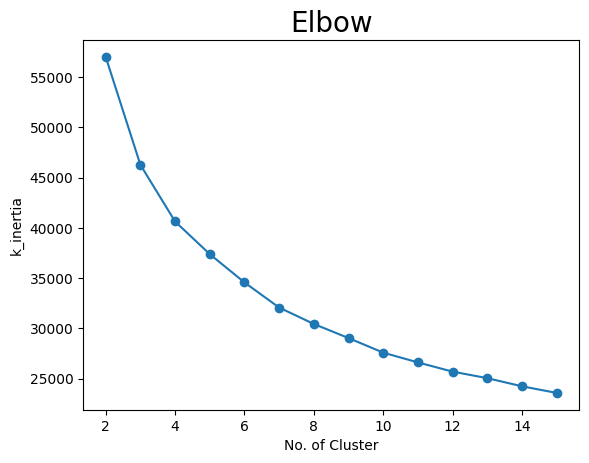

In [132]:
k_inertia = []
for i in range (2, 16):
    km = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state= 42)
    km.fit(df_clean_transform_second)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 16), k_inertia, marker="o")
plt.title('Elbow', fontsize=20)
plt.xlabel('No. of Cluster')
plt.ylabel('k_inertia')
plt.show()

Elbow method melihat dari nilai Within-Cluster Sum of Squares (WCSS) atau k_inertia. WCSS mengukur total varian dalam setiap kluster dan nilai nya akan menurun dimana nilai k naik karena semakin kecil kluster dapat melihat data point secara jelas. 

Penurunan k_inertia yang drasitis di lihat dari grafis ini. Semakin tinggi penurunan nya kemungkinan kluster tersebut ideal.

Bedasarkan grafis, penurunan drastis terjadi saat kluster 3 dan penurunan drastis kedua terjadi di kluster 4. Setelah 4 kluster, penurunan tidak lagi signifikan. Kemungkinan kluster ideal 3 atau 4.

## Silhouette Method

In [133]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Fungsi ini digunakan untuk menghitung nilai silhoutte_score dan membuat grafis. Silhouette method digunakan untuk mencari nilai silhouette yang range nya -1 sampai 1 dimana nilai 1 artinya model dapat mengklasifikasi data poin ke kluster secara sempurna, 0 artinya ada overlapping, dan -1 artinya poin salah kluster.

Plot bisa dilihat dari seberapa lebar tiap kluster dan juga distribusi data poin.

For n_clusters = 2 The average silhouette_score is : 0.2835870227981517
For n_clusters = 3 The average silhouette_score is : 0.24977691204777766
For n_clusters = 4 The average silhouette_score is : 0.20284342710991882
For n_clusters = 5 The average silhouette_score is : 0.20101044284381855
For n_clusters = 6 The average silhouette_score is : 0.2099846536313802
For n_clusters = 7 The average silhouette_score is : 0.22009586206050094
For n_clusters = 8 The average silhouette_score is : 0.21187726435313045
For n_clusters = 9 The average silhouette_score is : 0.20771959943456644


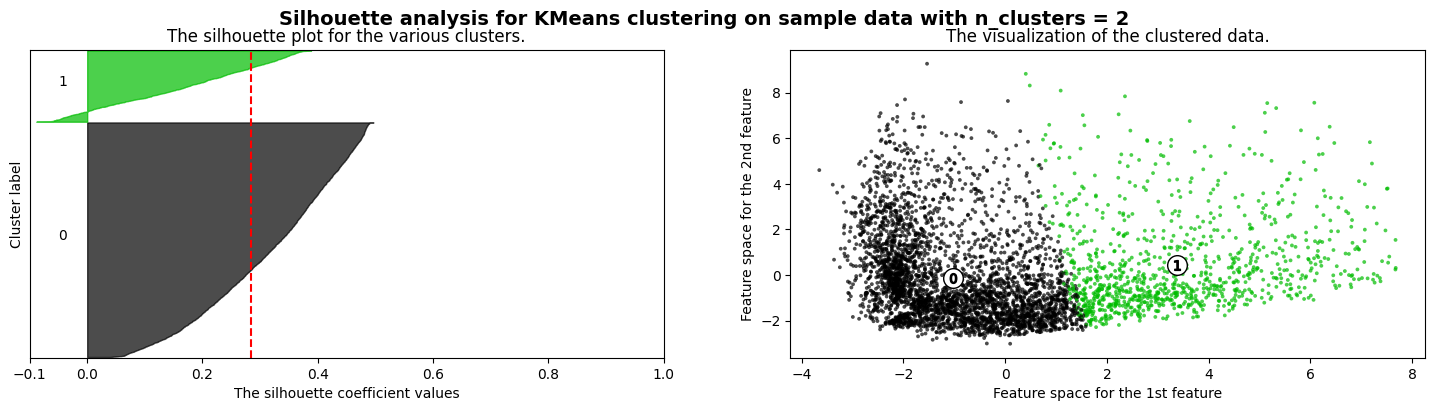

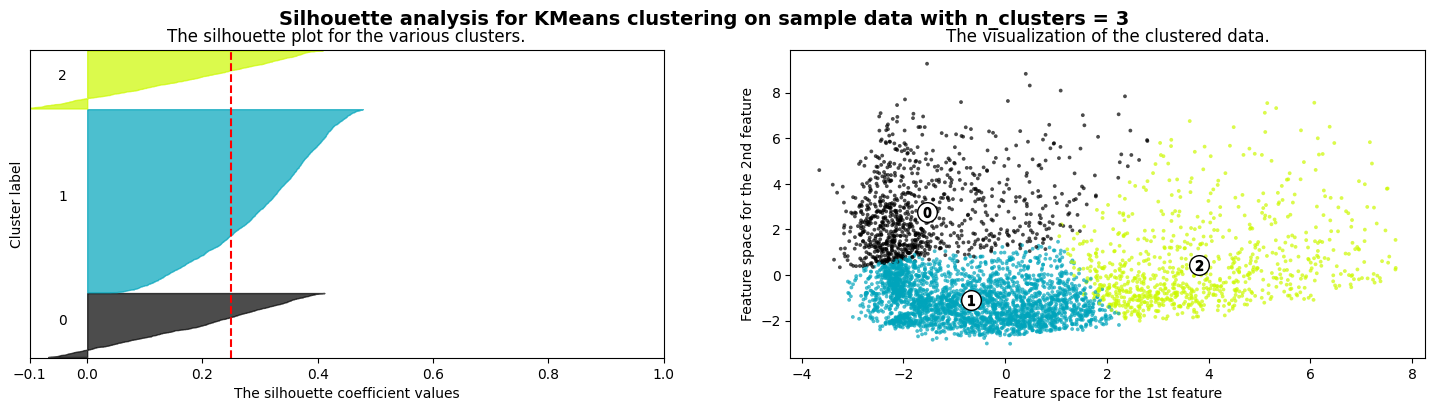

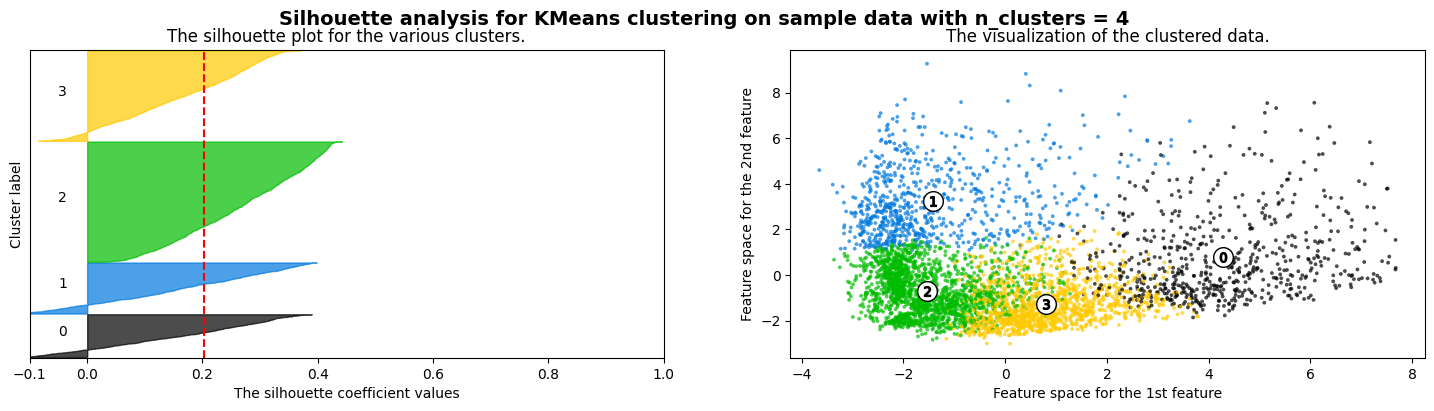

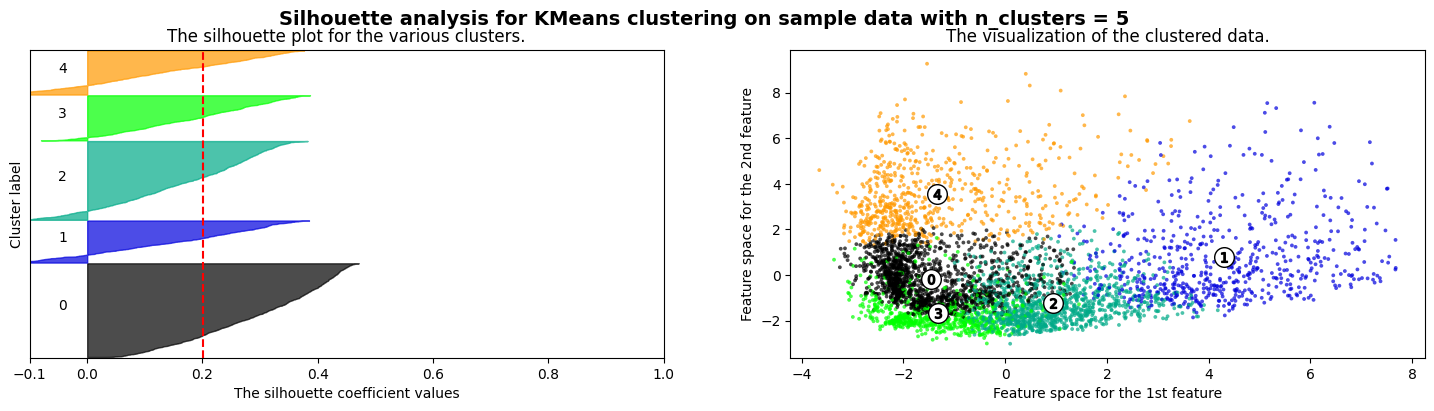

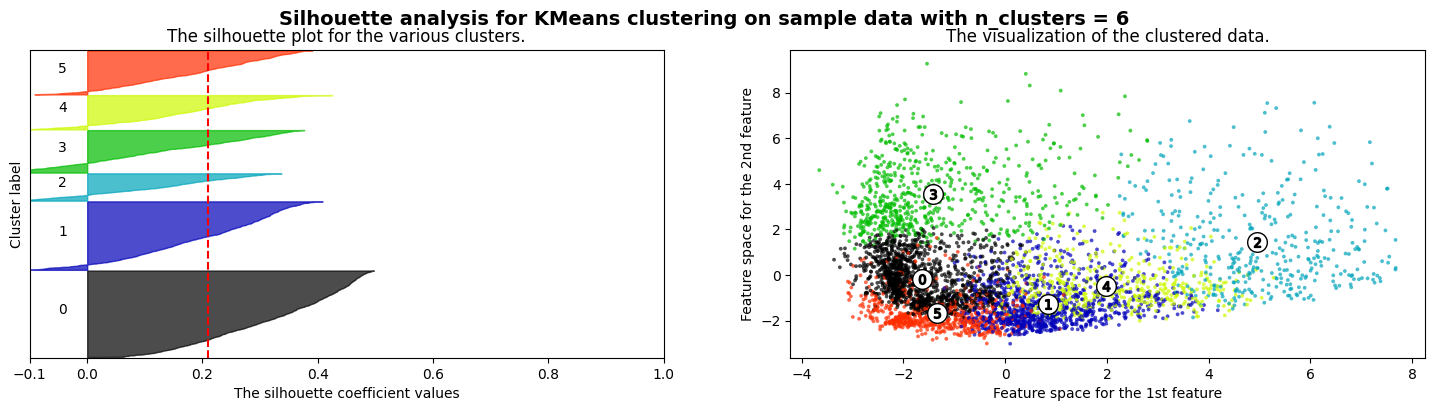

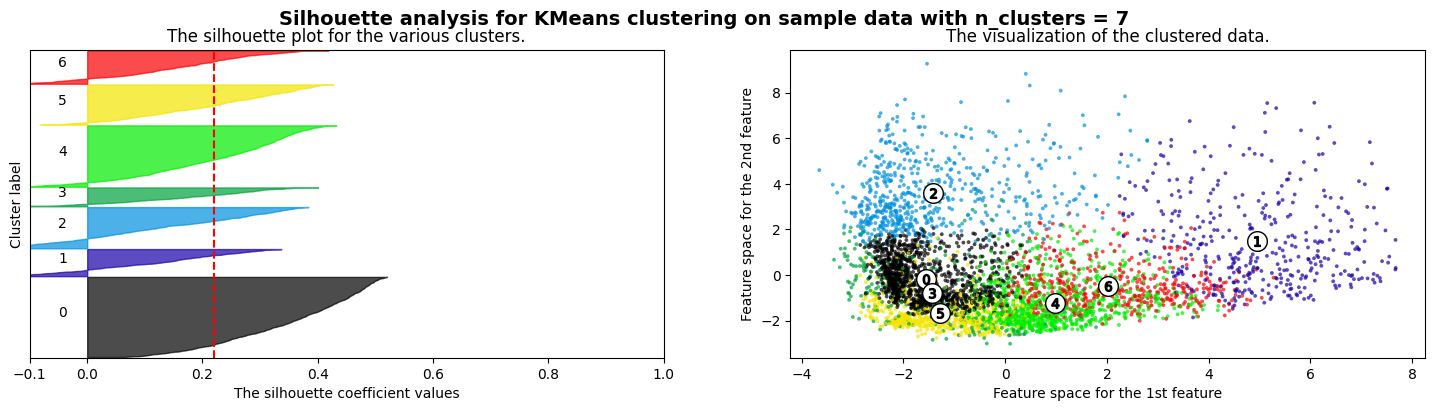

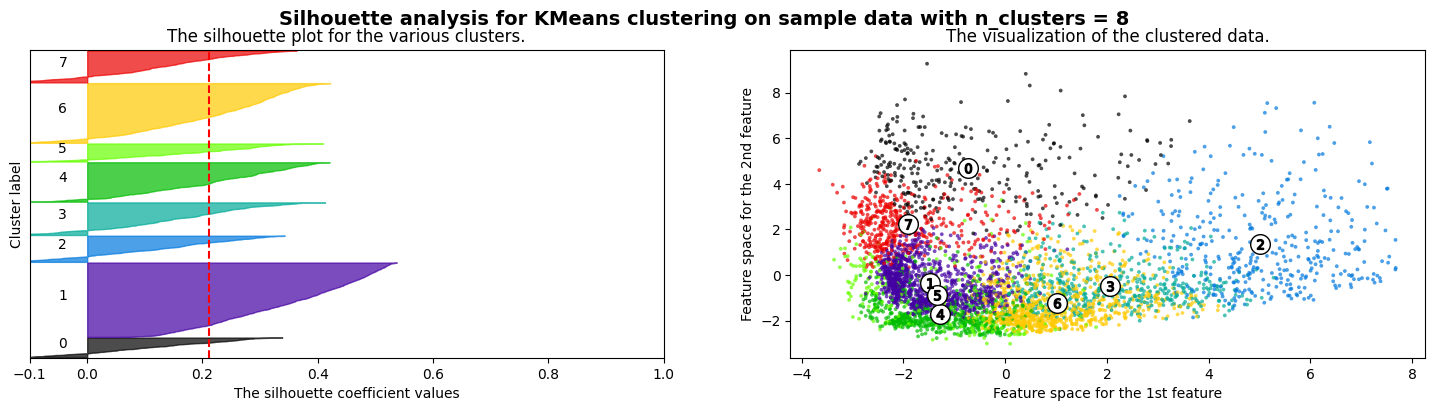

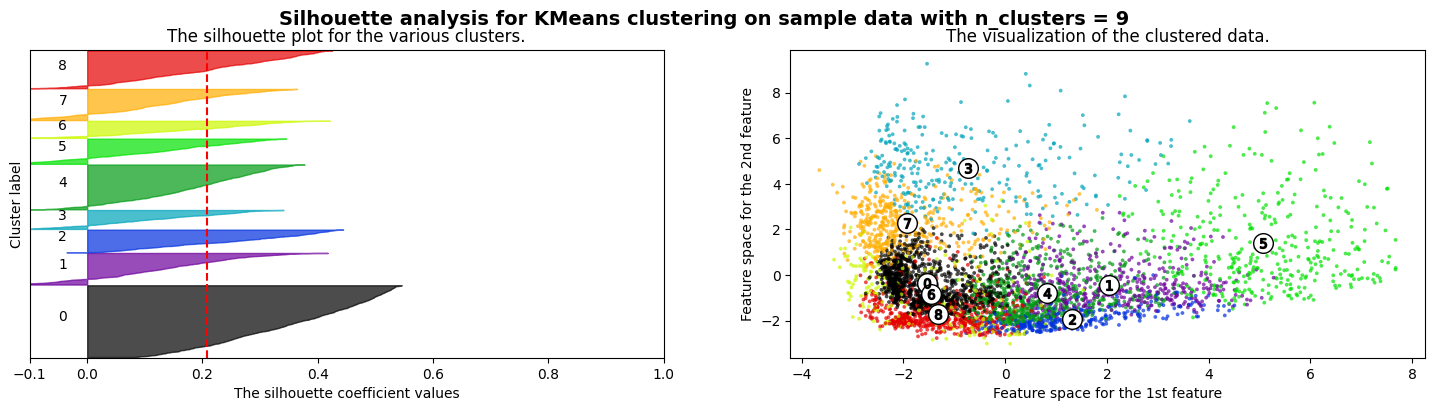

In [134]:
plot_silhouette(range(2, 10),df_clean_transform_second, 42)

Bedasarkan silhouette method kluster 3 adalah kluster yang ideal karena nilai silhouette score 0.24977691204777766, kedua tertinggi dan dari visualisasi clustered data, 3 kluster dapat dipisah dengan overlapping yang minim.

# 9. Model Training

In [135]:
km = KMeans(n_clusters = 3, random_state = 42)

Model KMeans dibuat dengan parameter n_clusters = 3 dan random_state = 42

In [136]:
pipe = Pipeline([
    ('transform',transformer),
    ('km_model',km)
])

Saya membuat pipeline bernama pipe dimana di dalam pipeline ini ada pipeline transfomer yang menjalankan proses feature enginerring dan model kmeans.

In [137]:
pipe.fit(df_clean)

Pipeline(steps=[('transform',
                 Pipeline(steps=[('capping',
                                  Winsorizer(capping_method='iqr', fold=3,
                                             tail='both',
                                             variables=['PURCHASES',
                                                        'ONEOFF_PURCHASES',
                                                        'INSTALLMENTS_PURCHASES',
                                                        'CASH_ADVANCE',
                                                        'CASH_ADVANCE_TRX',
                                                        'PURCHASES_TRX',
                                                        'PAYMENTS',
                                                        'MINIMUM_PAYMENTS'])),
                                 ('scaling', StandardScaler()),
                                 ('reducing', PCA(n_components=11))])),
                ('km_model', KMeans(n_clusters=3, random_state=42))])

Pipeline di fit untuk mempelajari pola di df_clean.

# 10. Model Prediction

In [138]:
pred = pipe.predict(df_clean)
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

hasil prediksi cluster di simpan di variable pred

In [139]:
df_kmeans = df.copy()
df_kmeans['cluster'] = pred
df_kmeans

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,365,0.859447,0.454545,23.00,23.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,313.980229,0.000000,12,0
1,731,14.871714,0.545455,62.70,62.70,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,125.780361,164.519883,0.000000,12,0
2,2353,71.046063,0.181818,1023.80,1023.80,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,20000.0,5872.895164,116.063003,0.000000,12,0
3,7901,1381.274840,1.000000,71.80,71.80,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,304.742004,415.236204,0.000000,12,0
4,6563,15.491884,0.272727,84.00,0.00,84.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,4,5000.0,178.182720,55.922251,0.272727,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,8427,632.807858,1.000000,453.91,318.91,135.00,927.939586,0.583333,0.333333,0.250000,0.500000,8,8,6000.0,350.387978,228.165965,0.000000,12,1
4471,2949,894.990470,0.636364,3184.54,2486.98,697.56,1578.893925,1.000000,0.583333,1.000000,0.500000,12,48,6500.0,3567.009988,220.979761,0.083333,12,2
4472,2327,2894.348509,1.000000,657.71,310.70,347.01,3384.772636,1.000000,0.166667,0.916667,0.583333,17,21,3500.0,3166.765636,1006.614717,0.000000,12,1
4473,1525,1854.659145,1.000000,151.69,151.69,0.00,443.392028,0.083333,0.083333,0.000000,0.750000,14,2,2000.0,496.543523,591.508322,0.000000,12,1


Saya membuat dataframe baru bernama df_kmeans yang mengambil kolom dari kopi dataframe df ditambah kolom baru yaitu cluster dari hasil prediksi

# 11. Exploratory Data Analysis Part 2

In [140]:
pca_2nd = PCA(n_components=2)

visualizer = Pipeline([
    ('capping',winsorizer),
    ('scaling',scaler),
    ('reducing',pca_2nd)
])

Saya membuat pipeline murni untuk visualisasi kluster dimana pca_2nd menggunakan n_component 2.

In [141]:
visualizer

Pipeline(steps=[('capping',
                 Winsorizer(capping_method='iqr', fold=3, tail='both',
                            variables=['PURCHASES', 'ONEOFF_PURCHASES',
                                       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                       'PAYMENTS', 'MINIMUM_PAYMENTS'])),
                ('scaling', StandardScaler()),
                ('reducing', PCA(n_components=2))])

<Axes: >

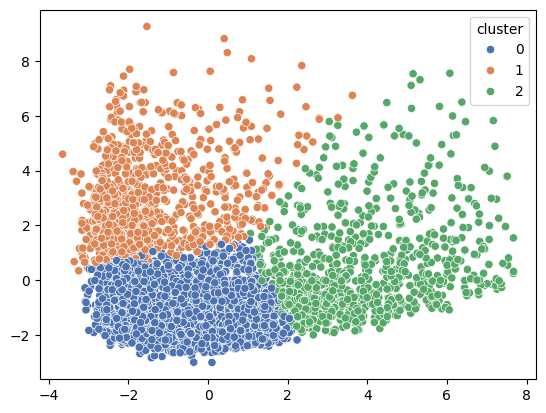

In [142]:
df_clean_visual = visualizer.fit_transform(df_clean)
sns.scatterplot(x=df_clean_visual[:,0], y=df_clean_visual[:,1], hue=df_kmeans['cluster'], palette='deep')

Berikut adalah visualisasi dari kluster yang dibuat. Terdapat 3 kluster dimana kluster 0 memiliki data point paling rapat.

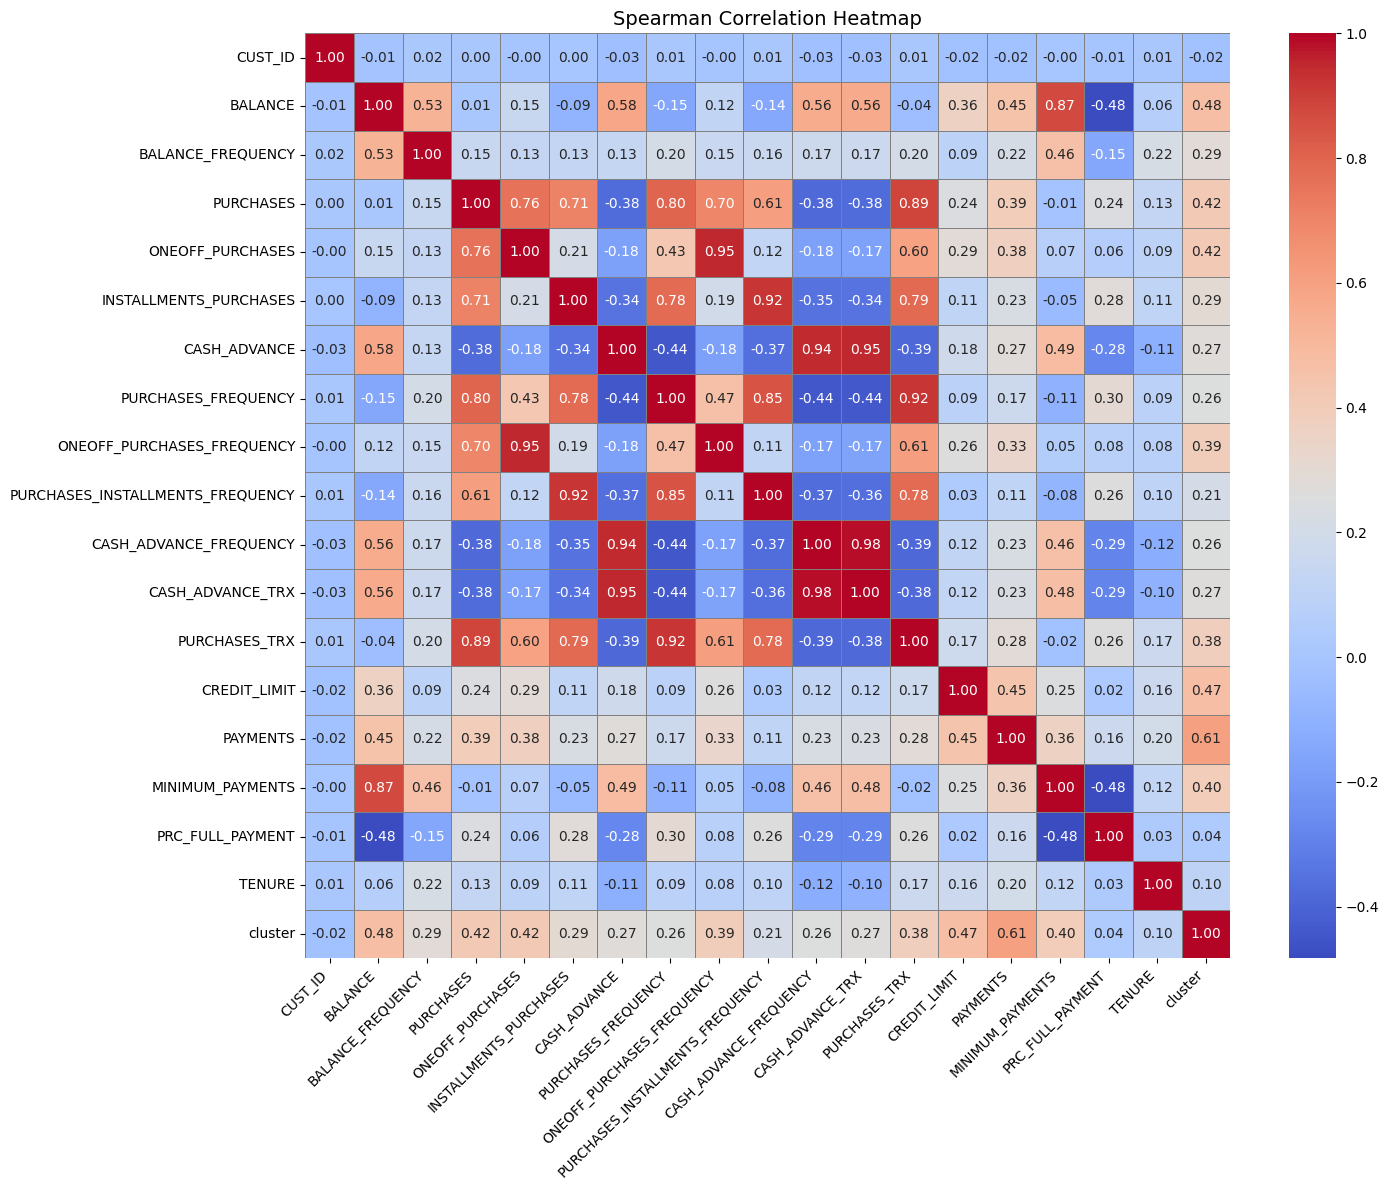

In [ ]:
corr_matrix = df_kmeans.corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, 
            annot=True,         
            fmt=".2f",          
            cmap="coolwarm",    
            annot_kws={"size": 10},  
            linewidths=0.5,     
            linecolor='gray',  
            square=True        
           )

plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   

plt.show()

Heatmap dibuat untuk mencari fitur-fitur yang berhubungan dan juga mencari ciri-ciri dari setiap cluster.

<Axes: xlabel='PURCHASES_TRX', ylabel='INSTALLMENTS_PURCHASES'>

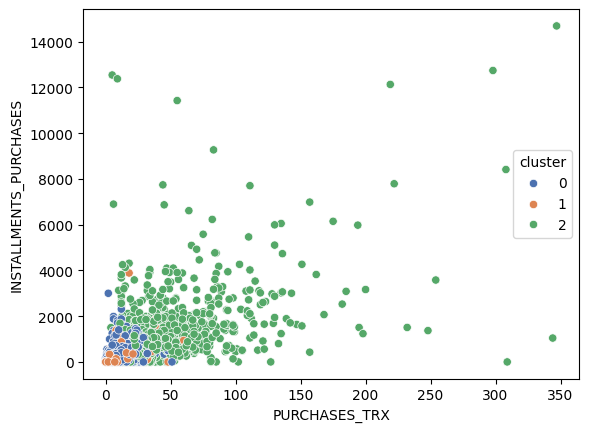

In [194]:
sns.scatterplot(data=df_kmeans, x="PURCHASES_TRX", y="INSTALLMENTS_PURCHASES", hue="cluster", palette='deep')

Di cluster 0 adalah orang-orang yang memiliki PURCHASES_TRX dan INSTALLMENTS_PURCHASES cukup banyak. Bisa dibilang orang-orang di cluster ini cukup sering melakukan pembelian dan juga pembelian itu dalam bentuk cicilan. Orang-orang ini mungkin cocok untuk di rekomendasi untuk kartu kredit.

Di cluster 1 adalah orang-orang yang memiliki PURCHASE_TRX dan INSTALLMENTS_PURCHASES rendah. Bisa dibilang orang-orang di cluster ini jarang melakukan transaksi dengan kartu kredit selain itu mereka juga jarang melakukan pembayaran cicilan. Kemungkinan orang-orang ini tidak bergantung kepada kartu kredit.

Di cluster 2 adalah orang-orang yang memiliki PURCHASE_TRX dan INSTALLMENTS_PURCHASES tinggi. Bisa dibilang orang-orang di cluster ini sangat suka belanja dan juga sangat sering melakukan cicilan. Orang-orang ini menurut saya sangat cocok untuk direkomendasi kartu kredit.

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES'>

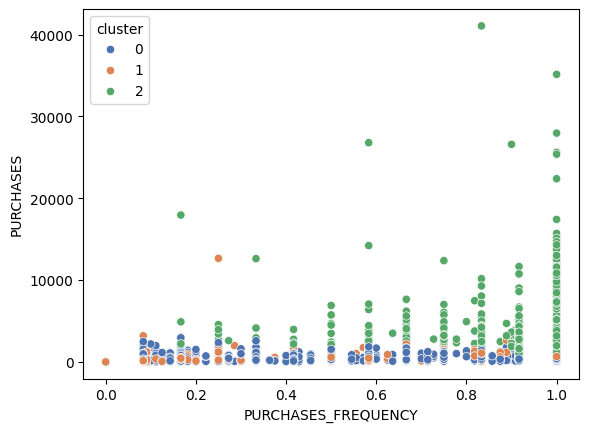

In [206]:
sns.scatterplot(data=df_kmeans, x="PURCHASES_FREQUENCY", y="PURCHASES", hue="cluster", palette='deep')

Di cluster 0 adalah orang-orang yang memiliki PURCHASES_FREQUENCY dimana jangkaun nya cukup lebar dan PURCHASES nya cukup banyak. Bisa dibilang orang-orang di cluster ini kemungkinan untuk membeli sesuai cukup tinggi tetapi tidak sebanyak cluster 2. Oleh karena itu orang-orang ini lumayan cocok di rekomendasi kartu kredi tetapi tidak perlu menjadi fokus.

Di cluster 1 adalah orang-orang yang memiliki PURCHASES_FREQUENCY dan PURCHASES yang rendah. Bisa dibilang orang-orang ini memang jrang melakukan pembelian dibandingkan orang-orang di cluster 0 dan 2. Orang-orang di cluster ini tidak direkomendasikan kartu kredit.

Di cluster 2 adalah orang-orang yang PURCHASES_FREQUENCY dan PURCHASES nya juga sangat tinggi. Kemungkinan orang-orang ini membeli sesuati cukup tinggi dan sering. Orang-orang ini cocok untuk di rekomendasi kartu kredit.

# 12. Model Saving

In [153]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

# 13. Pengambilan Kesimpulan

Bedasarkan analisis Customer Segmentation yang dilakukan, KMeans cukup bisa membedakan pelanggan di Bank Berlian menjadi 3 cluster. Cluster tersebut adalah 0 yaitu orang-orang yang cukup melakukan pembelian yang banyak walaupun kalau dilihat dari balance nya tidak terlalu banyak, Cluster 1 dimana orang jarang melakukan transaksi, dan Cluster 2 dimana orang-orang ini sangat sering melakukan transaksi. Menurut saya cluster 0 dan cluster 2 cocok direkomendasi kartu kredit terutama cluster 2.